<a href="https://colab.research.google.com/github/silizs/k_Nearest_Neighbours/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Импорты библиотек

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import scipy.spatial.distance
from scipy.stats import norm
import math
from collections import Counter

# 2. Предобработка датасета


[Данные](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) состоят из 100 000 наблюдений космоса, проведенных SDSS (Sloan Digital Sky Survey). Каждое наблюдение описывается 17 столбцами признаков и 1 столбцом класса, который идентифицирует его как звезду, галактику или квазар. Этот datasat направлен на классификацию звезд, галактик и квазаров на основе их спектральных характеристик.

In [ ]:
df = pd.read_csv('star_classification.csv')

In [ ]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.shape

(100000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [ ]:
df.isnull().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


In [ ]:
# Вспомогательные функции и константы

palette = sns.color_palette("flare")

def create_hist(name_column):
  sns.displot(df, x=name_column, hue="class", stat="density", multiple="stack", palette=palette, height=3.5, aspect=2.5)

def min_max_normalization(name_column):
  df_min = df[name_column].min()
  df_max = df[name_column].max()
  df[name_column] = (df[name_column] - df_min) / (df_max - df_min)

def z_normalization(name_column):
  df_mean = df[name_column].mean()
  df_std = df[name_column].std()
  df[name_column] = (df[name_column] - df_mean) / df_std

def create_heatmap():
  plt.subplots(figsize=(11, 11))
  sns.heatmap(df.drop(columns=['class']).corr(), annot=True, fmt=".2f", vmin=-1, vmax=1, center= 0, cmap='coolwarm')

### obj_ID
= Идентификатор объекта — уникальное значение, идентифицирующее объект в каталоге изображений, используемом CAS

In [ ]:
df.drop(columns=['obj_ID'], inplace=True)

### alpha
= угол прямого восхождения (в эпоху J2000)

<ipython-input-8-b6db7306064b>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(df, x=name_column, hue="class", stat="density", multiple="stack", palette=palette, height=3.5, aspect=2.5)


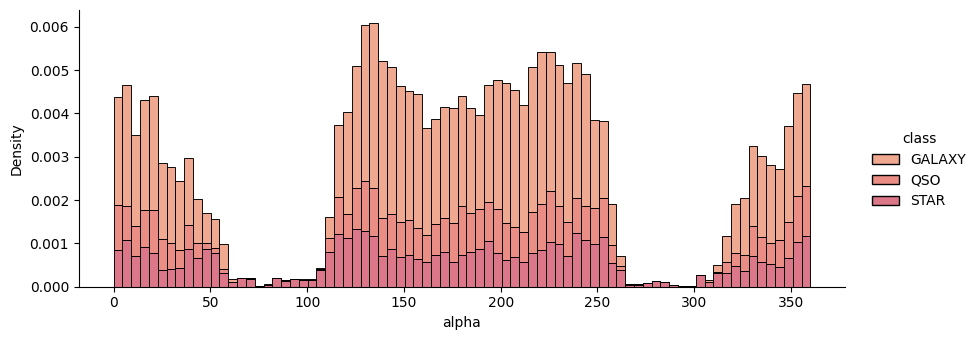

In [ ]:
create_hist('alpha')

In [ ]:
# Нормализуем значения
min_max_normalization('alpha')

### delta
= Угол склонения (в эпоху J2000)

<ipython-input-8-b6db7306064b>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(df, x=name_column, hue="class", stat="density", multiple="stack", palette=palette, height=3.5, aspect=2.5)


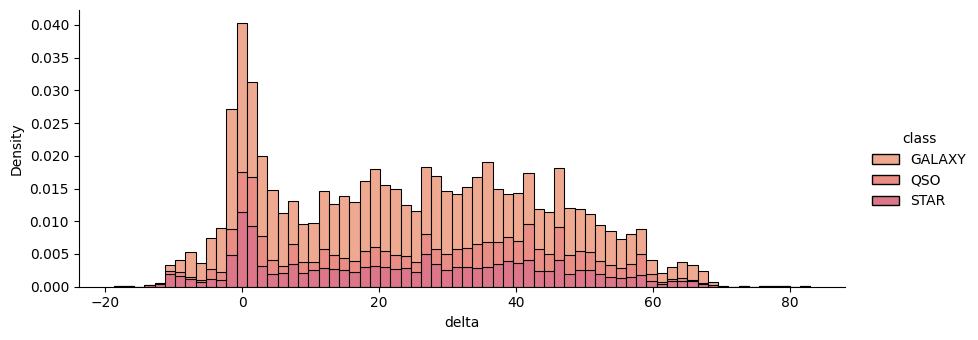

In [ ]:
create_hist('delta')

In [ ]:
min_max_normalization('delta')

### u
= Ультрафиолетовый фильтр в фотометрической системе

In [ ]:
# Выброс?
df['u'].describe()

,u
count,100000.000000
mean,21.980468
std,31.769291
min,-9999.000000
25%,20.352353
50%,22.179135
75%,23.687440
max,32.781390


In [ ]:
df[df['u'] == -9999]

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
79543,0.622235,0.178424,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [ ]:
# Удалим
df.drop([79543], inplace=True)

<ipython-input-8-b6db7306064b>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(df, x=name_column, hue="class", stat="density", multiple="stack", palette=palette, height=3.5, aspect=2.5)


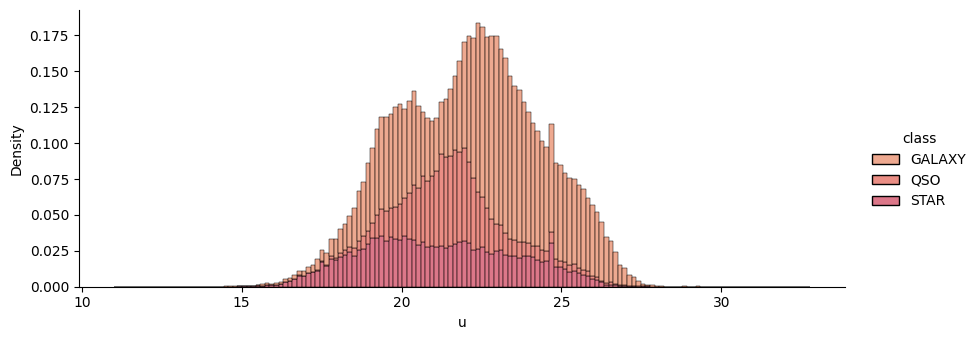

In [ ]:
create_hist('u')

In [ ]:
min_max_normalization('u')

### g
= Зеленый фильтр в фотометрической системе

<ipython-input-8-b6db7306064b>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(df, x=name_column, hue="class", stat="density", multiple="stack", palette=palette, height=3.5, aspect=2.5)


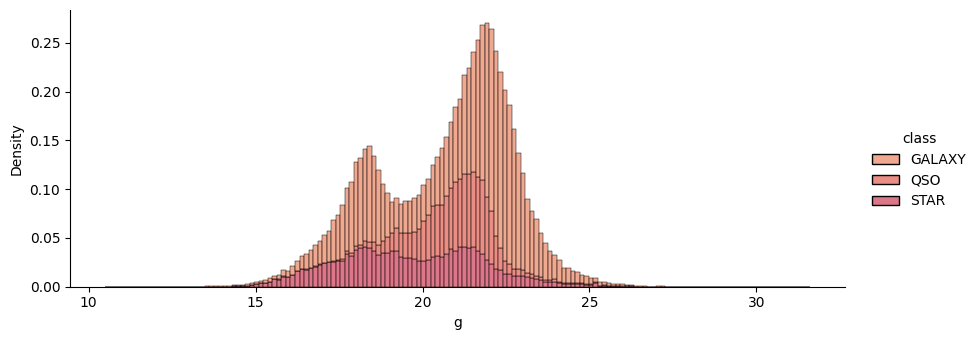

In [ ]:
create_hist('g')

In [ ]:
min_max_normalization('g')

### r
= Красный фильтр в фотометрической системе

<ipython-input-8-b6db7306064b>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(df, x=name_column, hue="class", stat="density", multiple="stack", palette=palette, height=3.5, aspect=2.5)


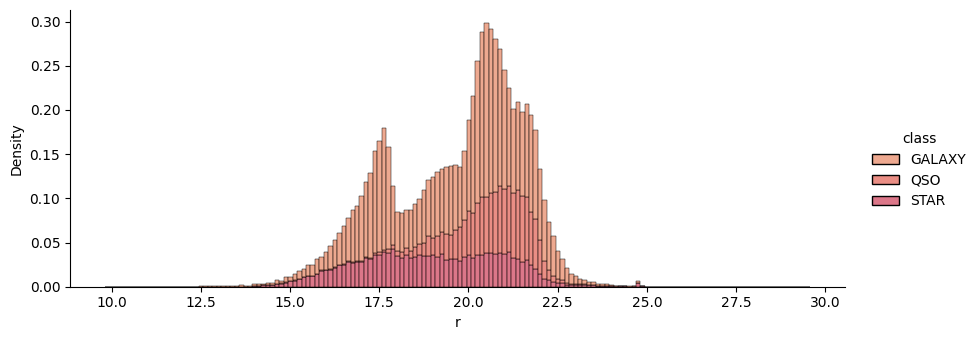

In [ ]:
create_hist('r')

In [ ]:
min_max_normalization('r')

### i
= Фильтр ближнего инфракрасного диапазона в фотометрической системе

<ipython-input-8-b6db7306064b>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(df, x=name_column, hue="class", stat="density", multiple="stack", palette=palette, height=3.5, aspect=2.5)


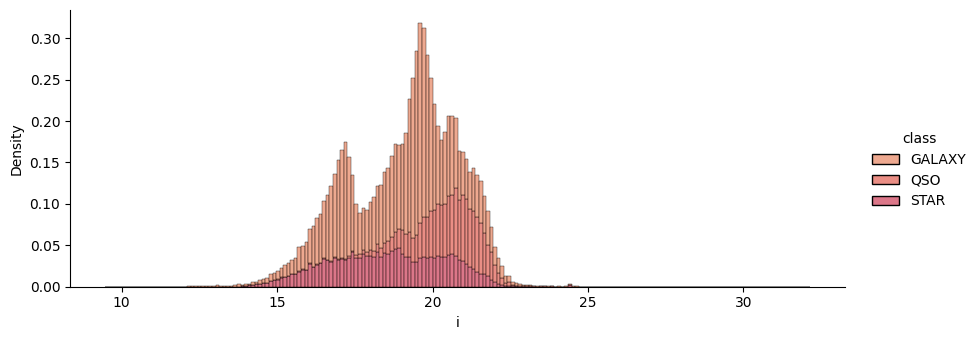

In [ ]:
create_hist('i')

In [ ]:
min_max_normalization('i')

### z
= Инфракрасный фильтр в фотометрической системе

<ipython-input-8-b6db7306064b>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(df, x=name_column, hue="class", stat="density", multiple="stack", palette=palette, height=3.5, aspect=2.5)


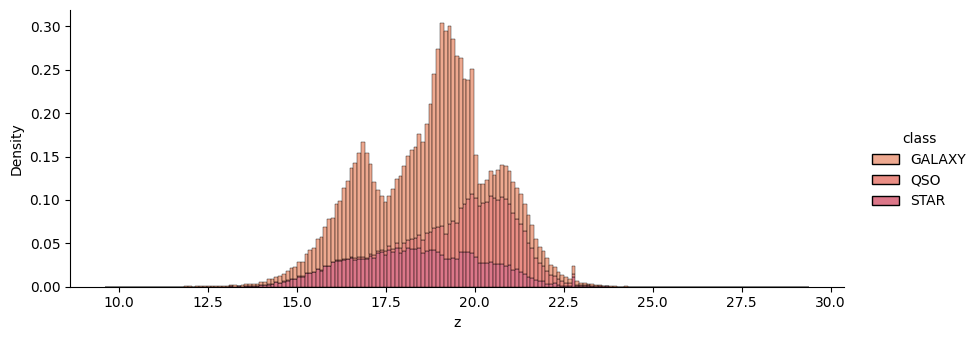

In [ ]:
create_hist('z')

In [ ]:
min_max_normalization('z')

### run_ID


= Номер запуска, используемый для идентификации конкретного сканирования

In [ ]:
df.drop(columns=['run_ID'], inplace=True)

### rerun_ID
= Номер повтора, указывающий, как было обработано изображение

In [ ]:
df['rerun_ID'].value_counts()

,count
rerun_ID,
301,99999


In [ ]:
# Только одно значение, бессмысленный признак. Удалим
df.drop(columns=['rerun_ID'], inplace=True)

### cam_col
= Столбец камеры для определения строки сканирования в ходе выполнения

In [ ]:
df['cam_col'].value_counts()

,count
cam_col,
4,19573
3,18851
5,18537
2,17116
1,13227
6,12695


In [ ]:
df = pd.get_dummies(df, columns=['cam_col'], prefix='cam_col_is', dtype=int)

### field_ID
= Номер поля

In [ ]:
df.drop(columns=['field_ID'], inplace=True)

### spec_obj_ID
= Уникальный идентификатор, используемый для оптических спектроскопических объектов

In [ ]:
df['spec_obj_ID'].value_counts()

,count
spec_obj_ID,
6.543777e+18,1
5.644169e+18,1
9.834876e+18,1
3.301259e+18,1
4.864118e+18,1
...,...
7.642688e+18,1
5.787208e+17,1
5.205269e+18,1


In [ ]:
df.drop(columns=['spec_obj_ID'], inplace=True)

### redshift
= значение красного смещения, основанное на увеличении длины волны

<ipython-input-8-b6db7306064b>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(df, x=name_column, hue="class", stat="density", multiple="stack", palette=palette, height=3.5, aspect=2.5)


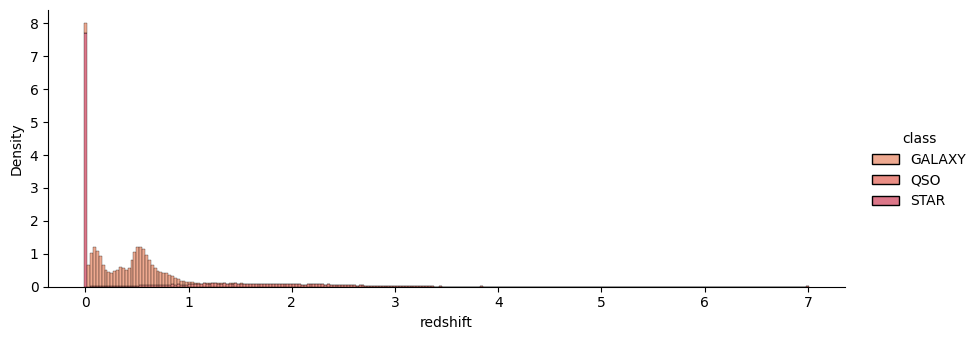

In [ ]:
create_hist('redshift')

In [ ]:
df['redshift'].describe()

,redshift
count,99999.000000
mean,0.576667
std,0.730709
min,-0.009971
25%,0.054522
50%,0.424176
75%,0.704172
max,7.011245


In [ ]:
z_normalization('redshift')

### plate
= идентификатор пластины, идентифицирует каждую пластину в SDSS

In [ ]:
df['plate'].value_counts()

,count
plate,
6301,98
7699,97
7407,96
7147,95
6516,94
...,...
2512,1
5745,1
2818,1


In [ ]:
# Пока оставим

<ipython-input-8-b6db7306064b>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(df, x=name_column, hue="class", stat="density", multiple="stack", palette=palette, height=3.5, aspect=2.5)


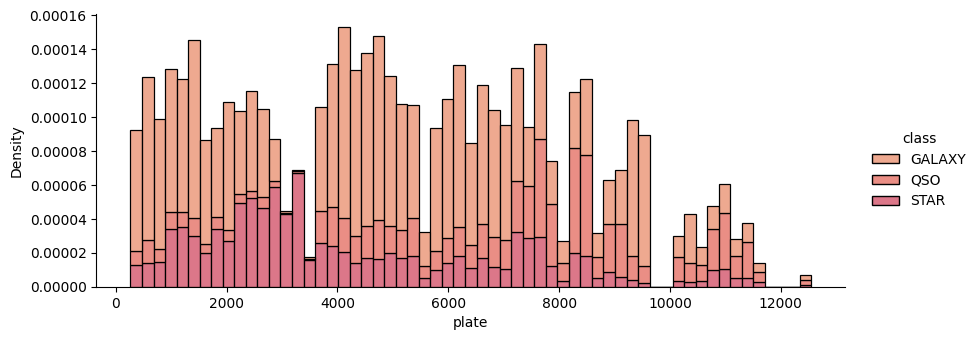

In [ ]:
create_hist('plate')

In [ ]:
min_max_normalization('plate')

### MJD
=  Модифицированная юлианская дата, используется для указания того, когда была получена данная часть данных SDSS

In [ ]:
df['MJD'].value_counts()

,count
MJD,
56625,249
58162,228
56658,217
56390,216
56385,201
...,...
55517,1
54894,1
53075,1


In [ ]:
# Тоже пока оставим
# Коррелирует ли с предыдущим?
df[['plate', 'MJD']].corr(method='pearson')

,plate,MJD
plate,1.000000,0.970167
MJD,0.970167,1.000000


In [ ]:
# Удалим дату
df.drop(columns=['MJD'], inplace=True)

### fiber_ID
= идентификатор волокна, который определяет волокно, направляющее свет в фокальную плоскость при каждом наблюдении

<ipython-input-8-b6db7306064b>:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(df, x=name_column, hue="class", stat="density", multiple="stack", palette=palette, height=3.5, aspect=2.5)


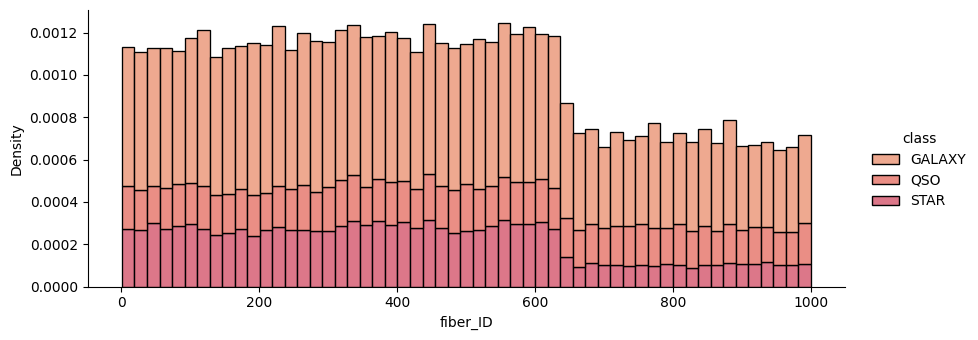

In [ ]:
create_hist('fiber_ID')

In [ ]:
df.drop(columns=['fiber_ID'], inplace=True)

### class - целевой категориальный признак
= object class (galaxy, star or quasar)

<ipython-input-47-c059eedec4df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="class", kind="count", palette=palette)
<ipython-input-47-c059eedec4df>:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.catplot(data=df, x="class", kind="count", palette=palette)


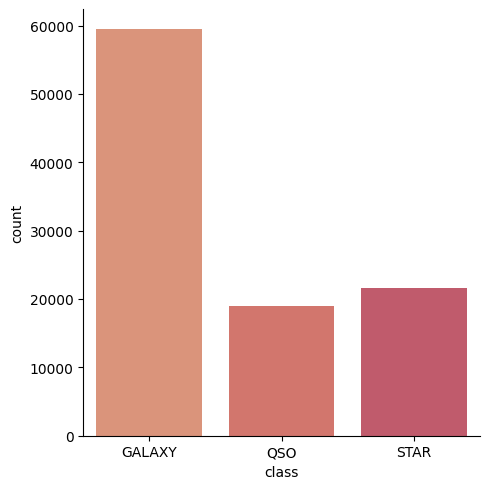

In [ ]:
# Посмотрим на распределение целевого признака
sns.catplot(data=df, x="class", kind="count", palette=palette)

Представителей класса GALAXY в три раза больше, чем каждого из представителей QSO и STAR.

In [ ]:
df['class'].value_counts()

,count
class,
GALAXY,59445
STAR,21593
QSO,18961


In [ ]:
df.head()

,alpha,delta,u,g,r,i,z,class,redshift,plate,cam_col_is_1,cam_col_is_2,cam_col_is_3,cam_col_is_4,cam_col_is_5,cam_col_is_6
0,0.376905,0.503802,0.591347,0.558050,0.535344,0.427665,0.464377,GALAXY,0.079549,0.451592,0,1,0,0,0,0
1,0.402286,0.491812,0.632603,0.584423,0.646203,0.515986,0.607035,GALAXY,0.277086,0.828841,0,0,0,0,1,0
2,0.394960,0.534139,0.654888,0.576463,0.546218,0.435729,0.472194,GALAXY,0.092414,0.350949,0,1,0,0,0,0
3,0.940947,0.180600,0.511384,0.629186,0.596946,0.486717,0.487460,GALAXY,0.486759,0.723312,0,0,1,0,0,0
4,0.959118,0.392679,0.387463,0.335579,0.337999,0.287021,0.300043,GALAXY,-0.630270,0.476753,0,0,1,0,0,0


### Посмотрим на корреляции

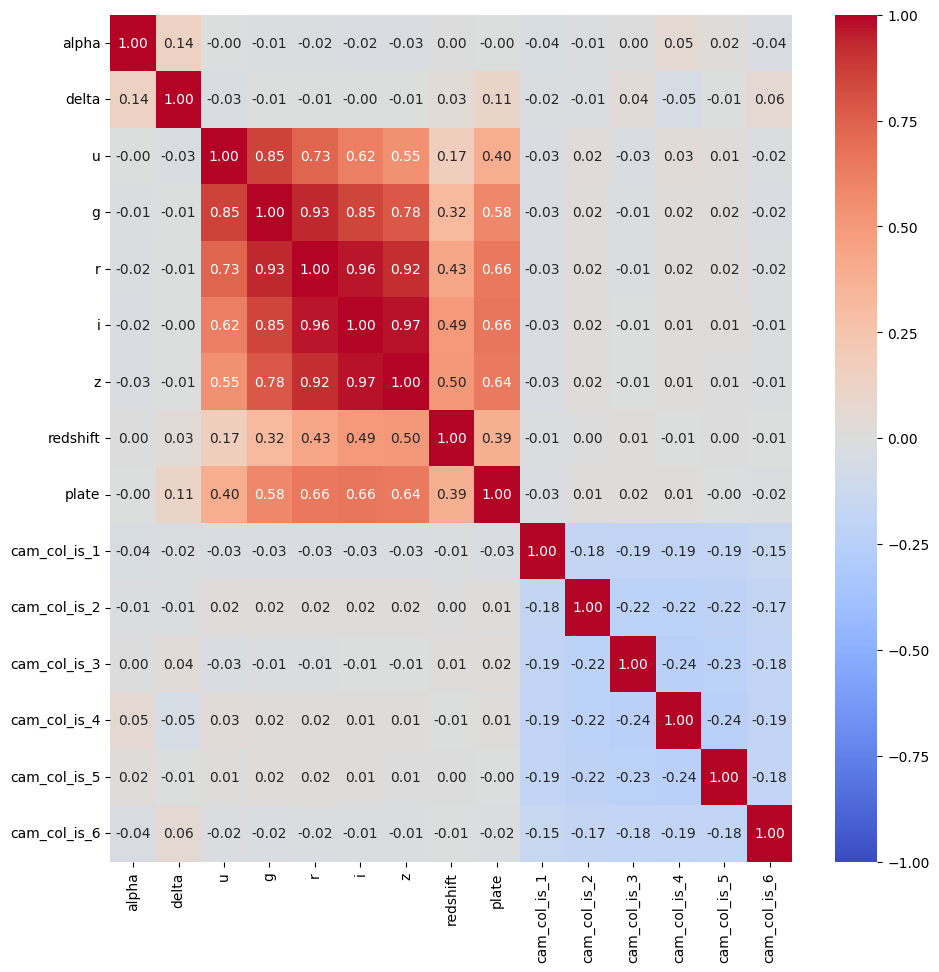

In [ ]:
create_heatmap()

In [ ]:
df['u_g'] = df['u'] - df['g']
min_max_normalization('u_g')

df['g_r'] = df['g'] - df['r']
min_max_normalization('g_r')

df['r_i'] = df['r'] - df['i']
min_max_normalization('r_i')

df['i_z'] = df['i'] - df['z']
min_max_normalization('i_z')

df.drop(columns=['u','g','r','i','z'], inplace=True)

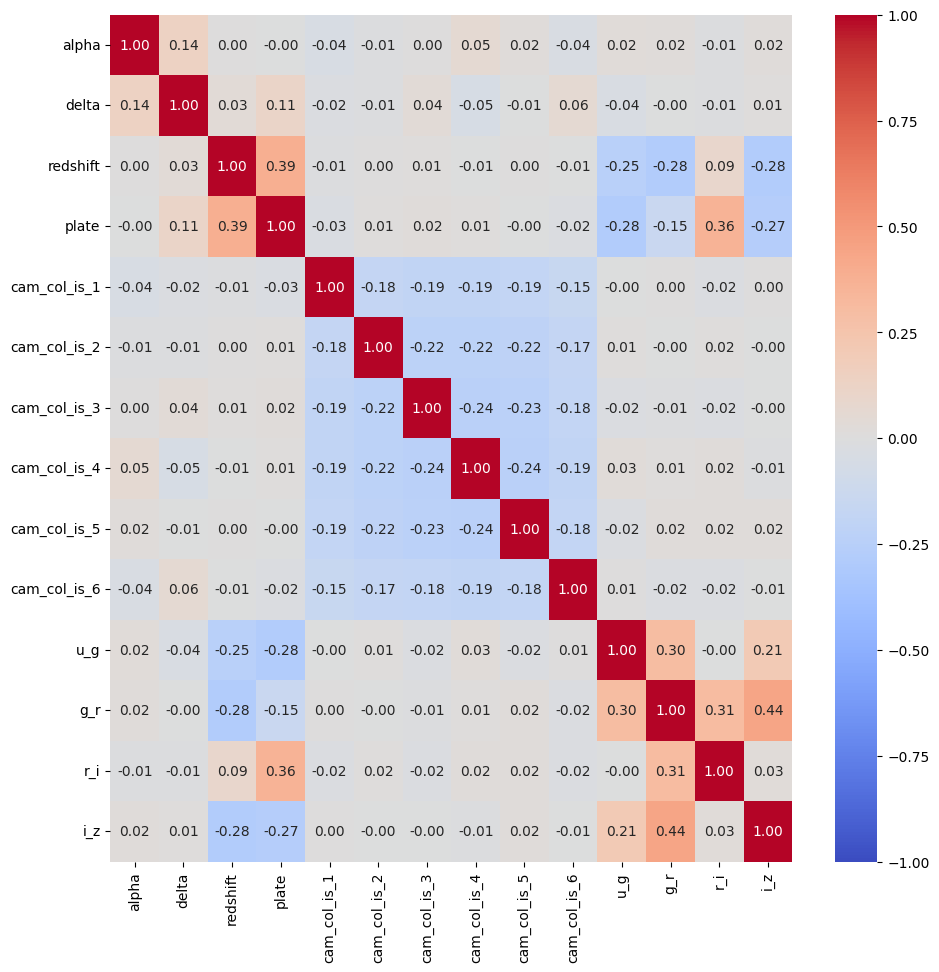

In [ ]:
create_heatmap()

In [ ]:
df.describe()

,alpha,delta,redshift,plate,cam_col_is_1,cam_col_is_2,cam_col_is_3,cam_col_is_4,cam_col_is_5,cam_col_is_6,u_g,g_r,r_i,i_z
count,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.493405,0.421678,1.158196e-16,0.396631,0.132271,0.171162,0.188512,0.195732,0.185372,0.126951,0.455638,0.508989,0.547760,0.528818
std,0.268067,0.192999,1.000000e+00,0.240397,0.338787,0.376652,0.391122,0.396765,0.388601,0.332920,0.037188,0.026849,0.022746,0.018408
min,0.000000,0.000000,-8.028333e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354206,0.235129,-7.145733e-01,0.184024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.429223,0.487307,0.531433,0.521057
50%,0.502494,0.416873,-2.086892e-01,0.384415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.452613,0.510929,0.543525,0.532179
75%,0.649703,0.576572,1.744956e-01,0.580938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.475400,0.529816,0.563912,0.538570
max,1.000000,1.000000,8.805943e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Реализация алгоритма


### kNearestNeighbors
-- класс, реализующий метод ближайших соседей.

Алгоритм работает:

*   с окнами фиксированного и нефиксированного размера (параметр `is_window_fixed`);
*   с различными ядрами: Равномерное, Треугольное, Епанечниково, Биквадратное, Гаусово, Косинусоидальное (параметр `kernel`);
*   с различными метриками: Косинусное расстояние, расстояния Чебышёва, Минковского L1 и (Евклидово) Минковского L2 (параметр `metric`);
*   с априорными весами.



In [ ]:
class kNearestNeighbors:
  # Приватные функции
  def _validate_args(self, is_window_fixed, k, kernel, metric):
    if not is_window_fixed and type(k) != int:
        raise ValueError(f"Invalid k for not-fixed window: {k}. It must be integer.")
    if kernel not in ['Uniform', 'Triangular', 'Gaussian', 'Epanechnikov', 'Biquadratic', 'Cosine']:
        raise ValueError(f"Invalid kerner: {kernel}. Choose from 'Uniform', 'Triangular', 'Gaussian', 'Epanechnikov', 'Biquadratic' or 'Cosine'.")
    if metric not in ['Cosine', 'Chebyshev', 'MinkowskiL1', 'MinkowskiL2']:
        raise ValueError(f"Invalid distance metric: {metric}. Choose from 'Cosine', 'Chebyshev', 'MinkowskiL1', 'MinkowskiL2'.")


  def _metric_function(self):
    def cosine(nums1, nums2):
      return 1 - np.dot(nums1, nums2) / (np.linalg.norm(nums1) * np.linalg.norm(nums2))
    def chebyshev(nums1, nums2):
      return max(abs(nums1[i] - nums2[i]) for i in range(len(nums1)))
    def minkowskiL1(nums1, nums2):
      return sum(abs(nums1[i] - nums2[i]) for i in range(len(nums1)))
    def minkowskiL2(nums1, nums2):
      return math.sqrt(sum(abs(nums1[i] - nums2[i])**2 for i in range(len(nums1))))

    metrics = {
        'Cosine' : cosine,
        'Chebyshev' : chebyshev,
        'MinkowskiL1' : minkowskiL1,
        'MinkowskiL2' : minkowskiL2
    }
    return metrics.get(self.metric)


  def _kernel_function(self):
    def Uniform(u):
      return 1/2
    def Triangular(u):
      return (1 - u)
    def Epanechnikov(u):
      return 3/4 * (1 - u ** 2)
    def Biquadratic(u):
      return 15/16 * (1 - u ** 2) ** 2
    def Cosine(u):
      return math.pi/4 * math.cos(math.pi/2 * u)

    kernels = {
         'Uniform' : Uniform,
         'Triangular' : Triangular,
         'Epanechnikov' : Epanechnikov,
         'Biquadratic' : Biquadratic,
         'Gaussian' : norm.ppf,
         'Cosine' : Cosine
         }
    return kernels.get(self.kernel)


  def _set_weights(self):
    map_y_to_count = Counter(self.y_train)
    self.weights = {}

    max_y_count = max(map_y_to_count.values())
    for y in map_y_to_count:
      self.weights[y] = max_y_count / map_y_to_count[y] if self.priori_weights_needed else 1


  def _set_neighbors(self):
    if self.is_window_fixed:
      self.neighbors = NearestNeighbors(radius=self.k, algorithm='ball_tree', metric=self._metric_function())
    else:
      self.neighbors = NearestNeighbors(n_neighbors=self.k + 1, algorithm='ball_tree', metric=self._metric_function())


  def _make_prediction(self, u):
    distances, indexes = self.neighbors.kneighbors([u])
    distances = distances[0]
    indexes = indexes[0]

    h = self.k if self.is_window_fixed else max(distances)
    kernel_function = self._kernel_function()
    y_values = {}

    for i in range(len(indexes)):
      index = indexes[i]
      distance = distances[i]

      y = self.y_train[index]
      if y not in y_values:
        y_values[y] = 0
      y_values[y] += kernel_function(distance / h) * self.weights[y]

    return max(y_values, key=y_values.get)


  # Публичные функции
  def __init__(
      self,
      is_window_fixed : bool,       # указывается с какими окнами будет работать алгоритм (фиксированного и нефиксированного размера)
      k : int | float,              # размер окна (если is_window_fixed) или количество соседей (если not is_window_fixed)
      kernel : str,                 # Равномерное, Гаусово, Епанечниково, Биквадратное, Косинусоидальное
      metric : str,                 # Косинусное, Чебышева, расстояние Минковского L1 и L2)
      priori_weights_needed : bool  # Устанавливать ли априорные веса
      ):
    self._validate_args(is_window_fixed, k, kernel, metric)
    self.is_window_fixed = is_window_fixed
    self.k = k
    self.kernel = kernel
    self.metric = metric
    self.priori_weights_needed = priori_weights_needed


  def fit(self, X_train, y_train):
    self.X_train, self.y_train = X_train, y_train
    self._set_weights()

    self._set_neighbors()
    self.neighbors.fit(self.X_train)


  def predict(self, X_test):
    return np.array([self._make_prediction(u) for u in X_test])

In [ ]:
X_train = [[-1, 2], [2, 0], [0, -2], [0, -5], [0, -6]]
y_train = ['R', 'R', 'B', 'B', 'B']

knn = kNearestNeighbors(False, 3, 'Cosine', 'MinkowskiL2', True)
knn.fit(X_train, y_train)

print(knn.weights)
print(knn.predict([[0, 0]]))

{'R': 1.5, 'B': 1.0}
['R']


# 4. Поиск гиперпараметров

Будем искать гиперпараметры с помощью поиска по сетке и кросс-валидации по k блокам. Целевой метрикой качества будет F-score.

In [ ]:
class_map = {'GALAXY': 0, 'STAR': 1, 'QSO' : 2}
df['class'] = df['class'].map(class_map)

В наборе данных очень много объектов, так что выбрем случайное подмнножество для анализа. Для этого перемешаем датасет.

In [ ]:
df = shuffle(df)
df.head()

,alpha,delta,class,redshift,plate,cam_col_is_1,cam_col_is_2,cam_col_is_3,cam_col_is_4,cam_col_is_5,cam_col_is_6,u_g,g_r,r_i,i_z
91764,0.549108,0.743077,0,-0.359417,0.085742,0,0,1,0,0,0,0.502355,0.541036,0.548622,0.542577
59622,0.039510,0.172649,0,-0.720654,0.334256,1,0,0,0,0,0,0.435723,0.464707,0.541901,0.520972
91888,0.374293,0.269639,0,0.031836,0.409413,1,0,0,0,0,0,0.496488,0.540709,0.574648,0.537738
20507,0.079263,0.342214,0,0.039710,0.877616,0,0,1,0,0,0,0.496771,0.529974,0.577178,0.538858
83743,0.586607,0.741004,0,-0.543371,0.072714,0,1,0,0,0,0,0.475508,0.523083,0.534033,0.540612


* `border` - граница отсечения на тренировочное и тестовое множество (80/20)
* `bias` - размер dev множества для кросс-валидации (для нее будем делить тренировочное множество на 5 частей)

In [ ]:
df = df[:1000]
border = 800
bias = 160

In [ ]:
train, test = df[:border], df[border:]

Посмотрим на распределение целевого значения на трейне и тесте.

<ipython-input-60-3b46cbf42977>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train, x="class", kind="count", palette=palette)
<ipython-input-60-3b46cbf42977>:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.catplot(data=train, x="class", kind="count", palette=palette)


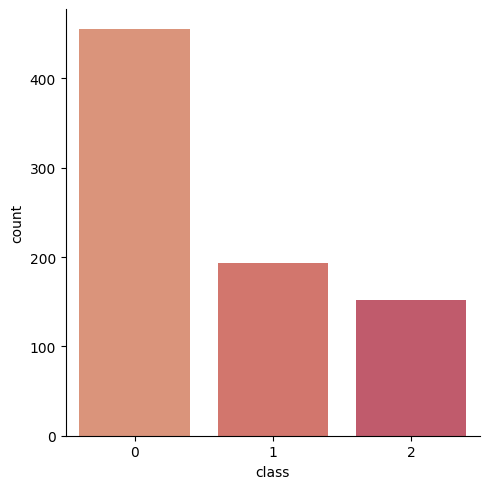

In [ ]:
sns.catplot(data=train, x="class", kind="count", palette=palette)

In [ ]:
def one_experiment_hyperparameter_quality(window, k, kernel, metric):
  knn = kNearestNeighbors(window, k, kernel, metric, False)

  f1_micro = 0
  f1_macro = 0
  f1_weighted = 0

  start = 0
  for i in range(5):
      end = start + bias

      _dev = train[start:end]
      _train = train.subtract(_dev, fill_value=0)

      dev_x, dev_y = _dev.drop('class', axis=1).values.tolist(), _dev['class'].values.tolist()
      train_x, train_y = _train.drop('class', axis=1).values.tolist(), _train['class'].values.tolist()

      knn.fit(train_x, train_y)
      pred_y = knn.predict(dev_x)

      f1_micro += 0.2 * f1_score(dev_y, pred_y, average='micro')
      f1_macro += 0.2 * f1_score(dev_y, pred_y, average='macro')
      f1_weighted += 0.2 * f1_score(dev_y, pred_y, average='weighted')

      start += bias

  return f1_micro, f1_macro, f1_weighted

In [ ]:
def search_for_hyperparameters():
  window_params = [True, False]
  n_params = [1, 2, 3, 4, 5, 10, 15, 20, 50]
  h_params = [2, 1, 1/2, 1/5, 1/10, 1/25, 1/50, 1/100, 1/200]
  kernel_params = ['Uniform', 'Triangular', 'Gaussian', 'Epanechnikov', 'Biquadratic', 'Cosine']
  metric_params = ['Cosine', 'Chebyshev', 'MinkowskiL1', 'MinkowskiL2']

  best_params = []
  best_f1_weighted = 0
  cnt = 0
  for window in window_params:
    for kernel in kernel_params:
      for metric in metric_params:
        if window == True:
          k_params = h_params
        else:
          k_params = n_params

        for k in k_params:
            _, _, f1_weighted  = one_experiment_hyperparameter_quality(window, k, kernel, metric)
            cnt += 1
            if f1_weighted > best_f1_weighted:
                  best_f1_weighted = f1_weighted
                  best_params = [window, k, kernel, metric]
                  print(f'best_f1_weighted: {best_f1_weighted}')
                  print(f'best_params: {best_params}')
            if cnt % 30 == 0:
              print(cnt)


In [ ]:
np.seterr(divide='ignore', invalid='ignore')
search_for_hyperparameters()

best_f1_weighted: 0.8499936919402624
best_params: [True, 2, 'Uniform', 'Cosine']
best_f1_weighted: 0.8805878065712014
best_params: [True, 2, 'Uniform', 'MinkowskiL1']
30
60
90
best_f1_weighted: 0.8944600665765023
best_params: [True, 0.2, 'Gaussian', 'MinkowskiL1']
120
150
180
210
240
270
best_f1_weighted: 0.9018068495869097
best_params: [False, 3, 'Triangular', 'MinkowskiL1']
best_f1_weighted: 0.9029402729272243
best_params: [False, 4, 'Triangular', 'MinkowskiL1']
300
330
best_f1_weighted: 0.9030960350009156
best_params: [False, 3, 'Epanechnikov', 'MinkowskiL1']
360
best_f1_weighted: 0.9033458699008532
best_params: [False, 3, 'Biquadratic', 'MinkowskiL1']
best_f1_weighted: 0.9070630618084811
best_params: [False, 4, 'Biquadratic', 'MinkowskiL1']
best_f1_weighted: 0.9072054619427659
best_params: [False, 5, 'Biquadratic', 'MinkowskiL1']
390
420


Лучшие значения гиперпараметров: `[False, 5, 'Biquadratic', 'MinkowskiL1']`.

Построим график зависимости целевой функции качества на тестовом и тренировочном множестве в зависимости от числа соседей.


In [ ]:
def crate_graphics(arr_n):
  f1_micro = []
  f1_macro = []
  f1_weighted = []
  for n in arr_n:
    mi, ma, we = one_experiment_hyperparameter_quality(False, n, 'Biquadratic', 'MinkowskiL1')
    f1_micro.append(mi)
    f1_macro.append(ma)
    f1_weighted.append(we)

  fig, axs = plt.subplots(1, 3, figsize=(12, 4))

  axs[0].scatter(arr_n, f1_micro)
  axs[0].set_xlabel('Количество соседей')
  axs[0].set_ylabel('f1_micro')

  axs[1].scatter(arr_n, f1_macro)
  axs[1].set_xlabel('Количество соседей')
  axs[1].set_ylabel('f1_macro')

  axs[2].scatter(arr_n, f1_weighted)
  axs[2].set_xlabel('Количество соседей')
  axs[2].set_ylabel('f1_weighted')

  plt.tight_layout()
  plt.show()

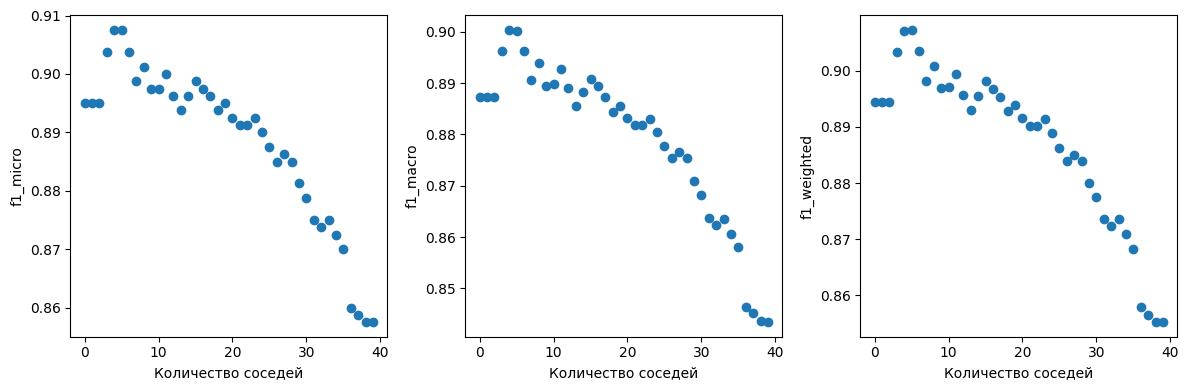

In [ ]:
crate_graphics([i for i in range(40)])

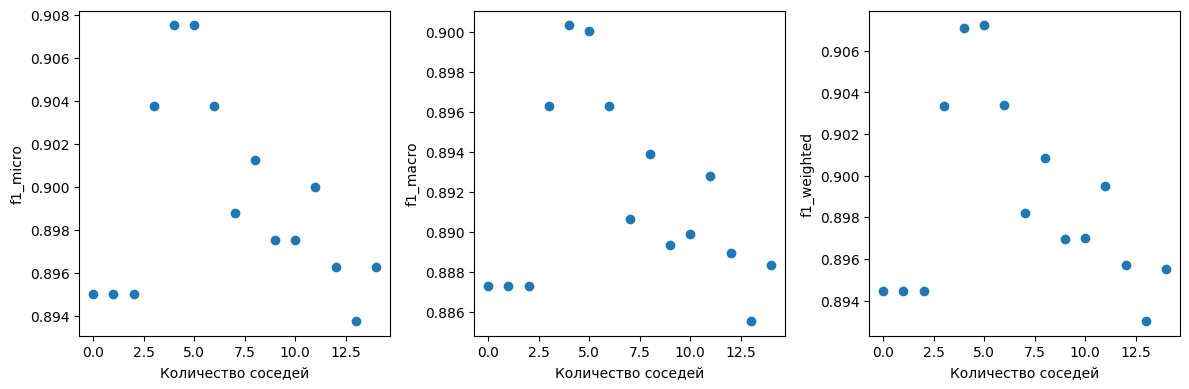

In [ ]:
crate_graphics([i for i in range(15)])

# 5. Оценка реализации


Напомним, что мы исспользуем F-меру для оценки качества алгоритма.

In [ ]:
def f_score_for_knn(knn, train_x, train_y, test_x, test_y, title):
  knn.fit(train_x, train_y)
  pred_y = knn.predict(test_x)

  f1_micro = f1_score(test_y, pred_y, average='micro')
  f1_macro = f1_score(test_y, pred_y, average='macro')
  f1_weighted = f1_score(test_y, pred_y, average='weighted')

  print(title)
  print(f'F1 (micro): {f1_micro}')
  print(f'F1 (macro): {f1_macro}')
  print(f'F1 (weighted): {f1_weighted}')
  print()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def implementation_assessment():
  train_x, train_y = train.drop('class', axis=1).values.tolist(), train['class'].values.tolist()
  test_x, test_y = test.drop('class', axis=1).values.tolist(), test['class'].values.tolist()

  my_knn = kNearestNeighbors(False, 6, 'Biquadratic', 'MinkowskiL1', False)
  library_knn = KNeighborsClassifier(n_neighbors=6, algorithm='ball_tree', metric='minkowski', p=1)

  f_score_for_knn(my_knn, train_x, train_y, test_x, test_y, 'Результат валидации реализованного алгоритма kNN на тестовом множестве')
  f_score_for_knn(library_knn, train_x, train_y, test_x, test_y, 'Валидация библиотечного алгоритма kNN на тестовом множестве')


In [ ]:
implementation_assessment()

Результат валидации реализованного алгоритма kNN на тестовом множестве
F1 (micro): 0.92
F1 (macro): 0.9061507936507937
F1 (weighted): 0.9190595238095238

Валидация библиотечного алгоритма kNN на тестовом множестве
F1 (micro): 0.9
F1 (macro): 0.8830149805680071
F1 (weighted): 0.8973402817925584

